In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [102]:
# 디렉토리 설정
os.chdir('/Users/seonggeun/Documents/GitHub/Study-note/6th_data')

In [103]:
# 역대 타자 성적 데이터 불러오기
regular = pd.read_csv('Regular_Season_Batter.csv')

In [104]:
# df에서 feature들 다 보이게 설정.
pd.set_option('display.max_columns', 500)
regular.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [105]:
# 데이터셋에 존재하는 features.
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [106]:
regular = regular[['batter_name', 'year', 'AB', 'position', 'OPS']]

In [107]:
# batter_name이 몇 개 있는지.
regular['batter_name'].nunique()

345

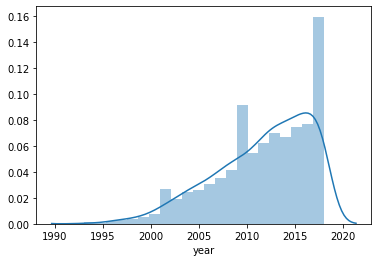

In [108]:
# year는 numerical data이므로 distribution plot.
sns.distplot(regular['year'])

In [109]:
regular['year'].describe()

count    2454.000000
mean     2011.614507
std         4.992833
min      1993.000000
25%      2008.000000
50%      2013.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

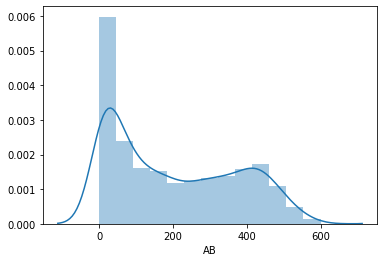

In [110]:
# AB 또한 numerical data이므로 distribution plot.
sns.distplot(regular['AB'])

In [111]:
regular['AB'].describe()

count    2454.000000
mean      201.514670
std       169.537029
min         0.000000
25%        38.250000
50%       163.000000
75%       357.500000
max       600.000000
Name: AB, dtype: float64

In [112]:
# position은 categorical data. value_counts() 사용.
regular['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

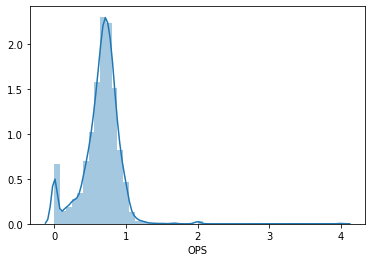

In [113]:
sns.distplot(regular['OPS'].dropna())

In [114]:
regular.OPS.describe()

count    2428.000000
mean        0.649939
std         0.261634
min         0.000000
25%         0.546000
50%         0.688637
75%         0.797234
max         4.000000
Name: OPS, dtype: float64

Text(0, 0.5, 'OPS')

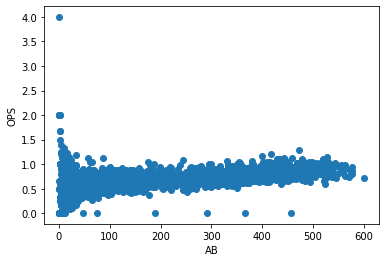

In [115]:
plt.scatter(regular['AB'], regular['OPS'])
plt.xlabel('AB')
plt.ylabel('OPS')

Text(0, 0.5, 'AB')

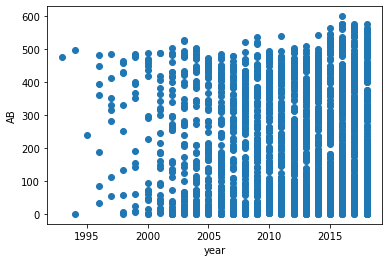

In [116]:
plt.scatter(regular.year, regular.AB)
plt.xlabel('year')
plt.ylabel('AB')

In [117]:
regular.groupby(['position'])['OPS'].mean().sort_values(ascending=False)

position
내야수(좌투좌타)    0.748972
외야수(우투양타)    0.697714
외야수(우투좌타)    0.685956
내야수(우투우타)    0.674866
외야수(우투우타)    0.665179
외야수(좌투좌타)    0.656005
내야수(우투좌타)    0.642086
포수(우투우타)     0.613227
포수(우투좌타)     0.592643
내야수(우투양타)    0.275000
Name: OPS, dtype: float64

In [118]:
regular = pd.read_csv('Regular_Season_Batter.csv')

# 1. 데이터 잘라내기

In [119]:
regular.loc[regular['OPS']>0.9]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000
53,4,강민호,2015,롯데,0.311,123,380,63,118,18,1,35,243,86,0,0,60,14,112,14,0.639000,0.421000,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,1.060000
54,4,강민호,2016,롯데,0.323,116,381,65,123,26,0,20,209,72,4,0,66,10,91,7,0.549000,0.433000,4,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.982000
78,7,강봉규,2009,삼성,0.310,126,449,89,139,24,2,20,227,78,20,3,69,4,61,15,0.505568,0.406130,4,NaN,1978년 01월 12일,NaN,부천초-개성중-경남고-고려대-두산-삼성,NaN,0.911698
95,10,강정호,2012,넥센,0.314,124,436,77,137,32,0,25,244,82,21,5,71,6,78,16,0.559633,0.417154,12,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.976787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,334,호잉,2018,한화,0.306,142,529,85,162,47,2,30,303,110,23,9,51,5,93,5,0.573000,0.369000,4,190cm/92kg,1989년 05월 18일,외야수(우투좌타),미국 Fort Loramie(고)-미국 Toledo(대),300000달러,0.942000
2403,336,홍성흔,2009,롯데,0.371,119,426,71,158,33,0,12,227,64,9,3,49,5,55,15,0.532864,0.441667,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,0.974531
2404,336,홍성흔,2010,롯데,0.350,111,431,88,151,28,1,26,259,116,2,2,54,7,49,18,0.600928,0.430894,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,1.031822
2408,336,홍성흔,2014,두산,0.315,124,447,63,141,19,1,20,222,82,5,3,64,4,79,13,0.496644,0.405825,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,0.902470


In [120]:
regular[regular.OPS>0.9]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000
53,4,강민호,2015,롯데,0.311,123,380,63,118,18,1,35,243,86,0,0,60,14,112,14,0.639000,0.421000,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,1.060000
54,4,강민호,2016,롯데,0.323,116,381,65,123,26,0,20,209,72,4,0,66,10,91,7,0.549000,0.433000,4,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.982000
78,7,강봉규,2009,삼성,0.310,126,449,89,139,24,2,20,227,78,20,3,69,4,61,15,0.505568,0.406130,4,NaN,1978년 01월 12일,NaN,부천초-개성중-경남고-고려대-두산-삼성,NaN,0.911698
95,10,강정호,2012,넥센,0.314,124,436,77,137,32,0,25,244,82,21,5,71,6,78,16,0.559633,0.417154,12,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.976787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,334,호잉,2018,한화,0.306,142,529,85,162,47,2,30,303,110,23,9,51,5,93,5,0.573000,0.369000,4,190cm/92kg,1989년 05월 18일,외야수(우투좌타),미국 Fort Loramie(고)-미국 Toledo(대),300000달러,0.942000
2403,336,홍성흔,2009,롯데,0.371,119,426,71,158,33,0,12,227,64,9,3,49,5,55,15,0.532864,0.441667,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,0.974531
2404,336,홍성흔,2010,롯데,0.350,111,431,88,151,28,1,26,259,116,2,2,54,7,49,18,0.600928,0.430894,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,1.031822
2408,336,홍성흔,2014,두산,0.315,124,447,63,141,19,1,20,222,82,5,3,64,4,79,13,0.496644,0.405825,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,0.902470


In [121]:
regular.loc[regular.batter_name=='박석민']

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
797,115,박석민,2004,삼성,0.103,23,29,2,3,1,0,1,7,3,0,0,2,1,7,3,0.241,0.188,1,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.429
798,115,박석민,2005,삼성,0.198,52,81,7,16,3,1,0,21,4,1,0,7,3,13,3,0.259,0.283,3,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.542
799,115,박석민,2008,삼성,0.279,126,416,65,116,27,1,14,187,64,2,3,61,12,84,15,0.450,0.385,18,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.835
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,0,24,173,62,0,0,54,17,66,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002
801,115,박석민,2010,삼성,0.303,112,356,58,108,18,0,15,171,64,3,2,76,15,84,14,0.480,0.440,7,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.920
802,115,박석민,2011,삼성,0.278,128,457,74,127,24,3,15,202,86,3,1,59,13,105,13,0.442,0.374,13,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.816
803,115,박석민,2012,삼성,0.312,127,443,79,138,19,3,23,232,91,2,3,72,27,83,8,0.524,0.433,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.957
804,115,박석민,2013,삼성,0.318,117,396,61,126,24,0,18,204,76,4,2,54,21,73,13,0.515,0.425,10,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.940
805,115,박석민,2014,삼성,0.315,110,356,77,112,21,0,27,214,72,0,1,54,12,62,12,0.601,0.419,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.020
806,115,박석민,2015,삼성,0.321,135,448,90,144,25,0,26,247,116,3,0,83,19,97,13,0.551,0.441,14,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.992


In [122]:
regular.loc[regular.year>2010]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,0,0,0,0,0,1,0,0,5,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,2,1,47,16,4,0,10,3,38,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


In [123]:
regular.loc[regular.batter_name=='박석민'][['year','OPS']]

,year,OPS
797,2004,0.429
798,2005,0.542
799,2008,0.835
800,2009,1.002
801,2010,0.920
802,2011,0.816
803,2012,0.957
804,2013,0.940
805,2014,1.020
806,2015,0.992


# 2. 변수 조작하기

In [124]:
regular.loc[regular.batter_name=='박석민']['OPS'].mean()

0.8494615384615384

In [125]:
# 이름이 '박석민'이고, year가 2009인 row를 찾기.
regular.loc[(regular.batter_name=='박석민') & (regular.year==2009)]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,0,24,173,62,0,0,54,17,66,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002


In [126]:
lag_1_OPS = []
for i in range(len(regular)):
    if len(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['OPS']) == 0:
        lag_1_OPS.append(np.nan)
    else:
        lag_1_OPS.append(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['OPS'].iloc[0])

In [127]:
regular['lag_1_OPS'] = lag_1_OPS

In [128]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'lag_1_OPS'],
      dtype='object')

In [129]:
for j in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E']:
    lag_1_OPS = []
    for i in range(len(regular)):
        if len(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j]) == 0:
            lag_1_OPS.append(np.nan)
        else:
            lag_1_OPS.append(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j].iloc[0])
    regular['lag_1_'+j] = lag_1_OPS
    print(j)

avg
G
AB
R
H
2B
3B
HR
TB
RBI
SB
CS
BB
HBP
SO
GDP
SLG
OBP
E


In [130]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E'],
      dtype='object')

# 3. 머신러닝

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
y = regular['OPS']
X = regular[['lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E']]

In [133]:
rf = RandomForestRegressor(n_estimators=500)

In [134]:
rf.fit(X.fillna(-1), y.fillna(-1))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [135]:
y_2018 = regular.loc[regular.year==2018]

In [136]:
feature_names = ['lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E']
train = regular.loc[regular.year<=2017]
test = regular.loc[regular.year==2018]

y_train = train['OPS']
X_train = train[feature_names]

y_test = test['OPS']
X_test = test[feature_names]

In [137]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train.fillna(-1), y_train.fillna(-1), sample_weight=train['AB'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [138]:
pred = rf.predict(X_test.fillna(-1))

In [139]:
real = test['OPS'].fillna(-1)
ab = test['AB']

In [140]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real, pred, sample_weight=ab)**0.5

0.13582639379760403

1. 데이터 불러오기
2. 시각화
3. Feature Engineering (lag)
4. Modeling -- 여기까지함.
5. 시각화
6. Feature Engineering
7. Lightgbm

avg는 변동성이 높다 --> avg 예측에 있어서 lag 변수보다 역대 avg가 더 큰 도움이 된다.

변동성 높은 변수는 역대 누적 변수를 사용하고,

변동성 낮은 변수는 그냥 lag 변수 사용.

In [141]:
regular.loc[regular['batter_name']=='박석민']

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,lag_1_OPS,lag_1_avg,lag_1_G,lag_1_AB,lag_1_R,lag_1_H,lag_1_2B,lag_1_3B,lag_1_HR,lag_1_TB,lag_1_RBI,lag_1_SB,lag_1_CS,lag_1_BB,lag_1_HBP,lag_1_SO,lag_1_GDP,lag_1_SLG,lag_1_OBP,lag_1_E
797,115,박석민,2004,삼성,0.103,23,29,2,3,1,0,1,7,3,0,0,2,1,7,3,0.241,0.188,1,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,115,박석민,2005,삼성,0.198,52,81,7,16,3,1,0,21,4,1,0,7,3,13,3,0.259,0.283,3,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.542,0.429,0.103,23.0,29.0,2.0,3.0,1.0,0.0,1.0,7.0,3.0,0.0,0.0,2.0,1.0,7.0,3.0,0.241,0.188,1.0
799,115,박석민,2008,삼성,0.279,126,416,65,116,27,1,14,187,64,2,3,61,12,84,15,0.450,0.385,18,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,0,24,173,62,0,0,54,17,66,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002,0.835,0.279,126.0,416.0,65.0,116.0,27.0,1.0,14.0,187.0,64.0,2.0,3.0,61.0,12.0,84.0,15.0,0.450,0.385,18.0
801,115,박석민,2010,삼성,0.303,112,356,58,108,18,0,15,171,64,3,2,76,15,84,14,0.480,0.440,7,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.920,1.002,0.285,97.0,295.0,63.0,84.0,17.0,0.0,24.0,173.0,62.0,0.0,0.0,54.0,17.0,66.0,5.0,0.586,0.416,6.0
802,115,박석민,2011,삼성,0.278,128,457,74,127,24,3,15,202,86,3,1,59,13,105,13,0.442,0.374,13,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.816,0.920,0.303,112.0,356.0,58.0,108.0,18.0,0.0,15.0,171.0,64.0,3.0,2.0,76.0,15.0,84.0,14.0,0.480,0.440,7.0
803,115,박석민,2012,삼성,0.312,127,443,79,138,19,3,23,232,91,2,3,72,27,83,8,0.524,0.433,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.957,0.816,0.278,128.0,457.0,74.0,127.0,24.0,3.0,15.0,202.0,86.0,3.0,1.0,59.0,13.0,105.0,13.0,0.442,0.374,13.0
804,115,박석민,2013,삼성,0.318,117,396,61,126,24,0,18,204,76,4,2,54,21,73,13,0.515,0.425,10,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.940,0.957,0.312,127.0,443.0,79.0,138.0,19.0,3.0,23.0,232.0,91.0,2.0,3.0,72.0,27.0,83.0,8.0,0.524,0.433,12.0
805,115,박석민,2014,삼성,0.315,110,356,77,112,21,0,27,214,72,0,1,54,12,62,12,0.601,0.419,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.020,0.940,0.318,117.0,396.0,61.0,126.0,24.0,0.0,18.0,204.0,76.0,4.0,2.0,54.0,21.0,73.0,13.0,0.515,0.425,10.0
806,115,박석민,2015,삼성,0.321,135,448,90,144,25,0,26,247,116,3,0,83,19,97,13,0.551,0.441,14,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.992,1.020,0.315,110.0,356.0,77.0,112.0,21.0,0.0,27.0,214.0,72.0,0.0,1.0,54.0,12.0,62.0,12.0,0.601,0.419,12.0


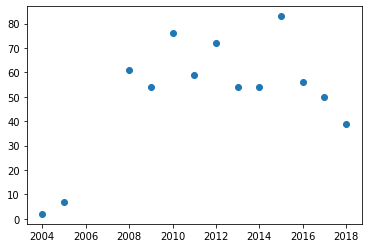

In [142]:
plt.scatter(regular.loc[regular.batter_name=='박석민']['year'], regular.loc[regular.batter_name=='박석민']['BB'])

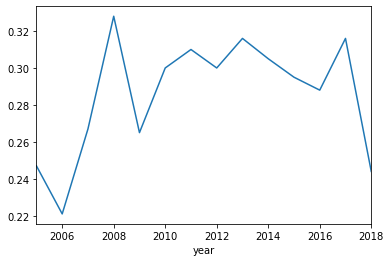

In [143]:
regular.loc[regular.batter_name=='최정'].groupby('year')['avg'].mean().plot()

avg's correlation:  0.42406761190587683


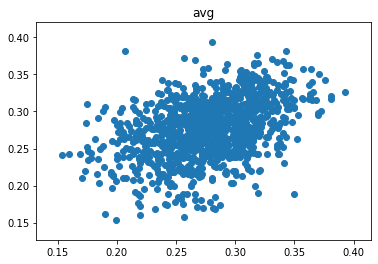

In [144]:
var='avg'

x, y = [], []

regular1 = regular.loc[regular.AB >=100]
for name in regular1['batter_name'].unique():
    a = regular1.loc[regular.batter_name==name]
    k = []
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])
        y.append(a.loc[a['year']==i+1,var].iloc[0])
        
plt.scatter(x, y)
plt.title('avg')

print("avg's correlation: ", pd.Series(x).corr(pd.Series(y)))

OPS's correlation:  0.5967835522092053


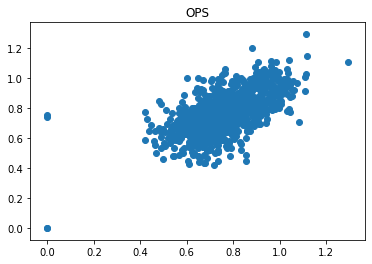

In [145]:
var='OPS'

x, y = [], []

regular1 = regular.loc[regular.AB >=100]
for name in regular1['batter_name'].unique():
    a = regular1.loc[regular.batter_name==name]
    k = []
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])
        y.append(a.loc[a['year']==i+1,var].iloc[0])
        
plt.scatter(x, y)
plt.title('OPS')

print("OPS's correlation: ", pd.Series(x).corr(pd.Series(y)))

BB's correlation:  0.6537531676446489


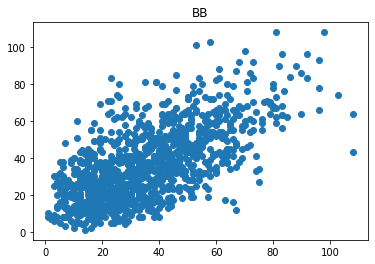

In [146]:
var='BB'

x, y = [], []

regular1 = regular.loc[regular.AB >=100]
for name in regular1['batter_name'].unique():
    a = regular1.loc[regular.batter_name==name]
    k = []
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])
        y.append(a.loc[a['year']==i+1,var].iloc[0])
        
plt.scatter(x, y)
plt.title('BB')

print("BB's correlation: ", pd.Series(x).corr(pd.Series(y)))

In [147]:
def get_self_corr(var):

    x, y = [], []

    regular1 = regular.loc[regular.AB >=100]
    for name in regular1['batter_name'].unique():
        a = regular1.loc[regular.batter_name==name]
        k = []
        for i in a['year'].unique():
            if (a['year']==i+1).sum()>0:
                k.append(i)
        for i in k:
            x.append(a.loc[a['year']==i,var].iloc[0])
            y.append(a.loc[a['year']==i+1,var].iloc[0])

    #plt.scatter(x, y)
    #plt.title(var)

    return (pd.Series(x).corr(pd.Series(y)))

In [148]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E'],
      dtype='object')

In [149]:
agg = {}
for i in ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E']:
    agg[i] = get_self_corr(i)

In [150]:
regular['1B'] = regular['H'] - regular['2B'] - regular['3B'] - regular['HR']
agg['1B'] = get_self_corr('1B')

In [151]:
agg

{'G': 0.2827945222858424,
 'AB': 0.5345220495165055,
 'R': 0.6226214086043601,
 'H': 0.5780431760833786,
 '2B': 0.5150624616599283,
 '3B': 0.44087969523833104,
 'HR': 0.7412597496536675,
 'TB': 0.6343944721859059,
 'RBI': 0.651947415097796,
 'SB': 0.7260764196191684,
 'CS': 0.5732143724546752,
 'BB': 0.6537531676446489,
 'HBP': 0.5627917256433479,
 'SO': 0.5664029028016614,
 'GDP': 0.4902224105414654,
 'SLG': 0.6139336781007896,
 'OBP': 0.5452616730047514,
 'E': 0.6225595423969393,
 '1B': 0.5363838342038814}

신뢰성이 높은 지표: 홈런, 삼진, 볼넷 (lag_ 변수들 이용)

신뢰성이 낮은 지표: 3루타, 타율, 1루타 (누적 성적으로 대체)

In [152]:
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016), '1B'].sum() / regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016), 'AB'].sum()

0.20100502512562815

In [153]:
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016), '3B'].sum() / regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016), 'AB'].sum()

0.017587939698492462

In [154]:
a = regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016)]
(a['avg']*a['AB']).sum()/a['AB'].sum()

0.24857537688442213

In [155]:
total_1BnAB = []
total_3BnAB = []
total_avg = [] 
for i in range(len(regular)):
    a = regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']<regular['year'].iloc[i])]
    total_1BnAB.append(a['1B'].sum()/a['AB'].sum())
    total_3BnAB.append(a['3B'].sum()/a['AB'].sum())
    total_avg.append((a['avg']*a['AB']).sum()/a['AB'].sum())

In [156]:
regular['total_1BnAB'] = total_1BnAB
regular['total_3BnAB'] = total_3BnAB
regular['total_avg'] = total_avg

변동성이 큰 지표들은 역대 누적 스탯으로 특성을 대체하는데, 그것을 total 변수라고 부른다.

# 모델링

In [184]:
regular = pd.read_csv('Regular_Season_Batter.csv')
del regular['team']
del regular['career']

In [185]:
agg = {}

for i in regular.columns:
    agg[i] = []

for i in regular.loc[regular['year']==2018, 'batter_name'].unique():
    for j in regular.columns:
        # 연도에 따라서 달라지지 않는 변수
        if j in ['batter_id', 'batter_name', 'height/weight', 'year_born', 'position', 'starting_salary']:
            agg[j].append(regular.loc[regular['batter_name']==i, j].iloc[0])
        # 2019년도 성적. 아무것도 모르므로 0.
        elif j in ['avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E', 'OPS']:
            agg[j].append(0)
        elif j == 'year':
            agg[j].append(2019)

In [186]:
pd.DataFrame(agg, columns=regular.columns)

,batter_id,batter_name,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,starting_salary,OPS
0,0,가르시아,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177cm/93kg,1985년 04월 12일,내야수(우투우타),NaN,0
1,1,강경학,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),10000만원,0
2,2,강구성,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),9000만원,0
3,3,강민국,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176cm/80kg,1992년 01월 10일,내야수(우투우타),20000만원,0
4,4,강민호,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,185cm/100kg,1985년 08월 18일,포수(우투우타),9000만원,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,337,홍재호,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180cm/79kg,1987년 05월 10일,내야수(우투우타),4000만원,0
223,338,홍창기,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189cm/94kg,1993년 11월 21일,외야수(우투좌타),8000만원,0
224,341,황윤호,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177cm/78kg,1993년 09월 22일,내야수(우투우타),3000만원,0
225,342,황재균,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),6000만원,0


In [187]:
regular = pd.concat([regular, pd.DataFrame(agg, columns=regular.columns)])

In [188]:
regular.year.value_counts() 

2019    227
2018    227
2017    217
2016    213
2015    207
2013    194
2014    186
2012    174
2011    151
2010    130
2009    124
2008    115
2007     98
2006     85
2005     73
2004     68
2003     54
2002     43
2001     32
2000     20
1999     14
1998     10
1997      8
1996      7
1994      2
1995      1
1993      1
Name: year, dtype: int64

In [189]:
regular['1B'] = regular['H']-regular['2B']-regular['3B']-regular['HR']

In [190]:
for j in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E']:
    lag_1_OPS = []
    for i in range(len(regular)):
        if len(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j]) == 0:
            lag_1_OPS.append(np.nan)
        else:
            lag_1_OPS.append(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j].iloc[0])
    regular['lag_1_'+j] = lag_1_OPS
    print(j)

avg
G
AB
R
H
2B
3B
HR
TB
RBI
SB
CS
BB
HBP
SO
GDP
SLG
OBP
E


In [191]:
 total_1BnAB = []
total_3BnAB = []
total_avg = [] 
for i in range(len(regular)):
    a = regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']<regular['year'].iloc[i])]
    total_1BnAB.append(a['1B'].sum()/a['AB'].sum())
    total_3BnAB.append(a['3B'].sum()/a['AB'].sum())
    total_avg.append((a['avg']*a['AB']).sum()/a['AB'].sum())

In [192]:
regular['total_1BnAB'] = total_1BnAB
regular['total_3BnAB'] = total_3BnAB
regular['total_avg'] = total_avg

In [193]:
input_var = [x for x in regular.columns if ('lag_' in x)|('total_' in x)]

In [194]:
train = regular.loc[regular['year']<=2018]
train = train.loc[-train['OPS'].isnull()]

test = regular.loc[regular['year']==2019]

In [195]:
X = train[input_var]
y = train['OPS']

In [196]:
train[input_var].isnull().mean()

lag_1_avg      0.228171
lag_1_G        0.223229
lag_1_AB       0.223229
lag_1_R        0.223229
lag_1_H        0.223229
lag_1_2B       0.223229
lag_1_3B       0.223229
lag_1_HR       0.223229
lag_1_TB       0.223229
lag_1_RBI      0.223229
lag_1_SB       0.223229
lag_1_CS       0.223229
lag_1_BB       0.223229
lag_1_HBP      0.223229
lag_1_SO       0.223229
lag_1_GDP      0.223229
lag_1_SLG      0.228171
lag_1_OBP      0.228171
lag_1_E        0.223229
total_1BnAB    0.141680
total_3BnAB    0.141680
total_avg      0.141680
dtype: float64

In [197]:
import lightgbm as lgb
param = {'num_leaves': 100,
        'min_data_in_leaf': 30,
        'objective': 'regression',
        'max_depth': 6,
        'learning_rate': 0.02,
        'boosting': 'gbdt',
        'feature_fraction': 0.7522,
        'bagging_freq': 1,
        'bagging_fraction': 0.7083,
        'bagging_seed': 11,
        'metric': 'rmse',
        'random_state': 133}
trn_data = lgb.Dataset(train[input_var], label=train['OPS'], weight=train['AB'])
num_round = 800
clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data], verbose_eval=0, early_stopping_rounds=200)
predictions = clf.predict(test[input_var], num_iteration=clf.best_iteration)

OSError: dlopen(/opt/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [200]:
pip install gcc@8

ERROR: Invalid requirement: 'gcc@8'
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
